In [21]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=[8,8]
#8 pollici x 8 pollici

sns.set_style("whitegrid")

In [22]:
X,y = make_blobs(   #Generate isotropic Gaussian blobs for clustering
    n_samples= 90,
    n_features=2,
    centers=3,
    cluster_std=1,
    random_state=18
)
#n_samples= numero di osservazioni nel nostro data
#centers = numero di centroidi 
print(X.shape) #(90,2) 90 osservazioni e 2 variabili 
print(y.shape)

for i, el in enumerate(X): #adds a counter to an iterable and returns it as an enumerate object
    print(f"{el} -> {y[i]}")

### 
i=0
for el in X:
    print(f"{el}->{y[i]}")
    i=i+1

(90, 2)
(90,)
[ 7.56908233 -5.02425779] -> 1
[ 7.0303982  -5.83031236] -> 1
[7.22267162 6.42132182] -> 2
[ 5.0745317  -0.18125664] -> 0
[ 1.83953318 -0.91293476] -> 0
[6.98893084 4.8450411 ] -> 2
[1.88871816 0.0352033 ] -> 0
[ 6.36707278 -5.61634731] -> 1
[7.67455721 4.92165212] -> 2
[ 8.0564739  -5.77506929] -> 1
[ 6.01021784 -6.92307264] -> 1
[10.1916007 -6.8229425] -> 1
[ 2.67109813 -0.53683899] -> 0
[ 8.06676685 -6.33081874] -> 1
[3.90233967 1.4798274 ] -> 0
[ 1.59428598 -1.01082641] -> 0
[ 6.92126295 -4.903249  ] -> 1
[ 4.08470109 -0.44447749] -> 0
[6.89187719 2.98273824] -> 2
[7.49246769 5.18196024] -> 2
[7.01091728 6.49996629] -> 2
[ 7.77594223 -6.05419516] -> 1
[4.01638832 0.50331627] -> 0
[6.31001778 6.66680508] -> 2
[7.02081795 4.37331554] -> 2
[7.60381227 6.77951016] -> 2
[4.14618598 0.78615262] -> 0
[ 2.45155665 -2.18207966] -> 0
[6.81530987 5.12490101] -> 2
[2.18827069 0.17653162] -> 0
[ 9.74211632 -6.7161669 ] -> 1
[5.99273355 4.85156916] -> 2
[3.54194955 1.32554221] -> 0

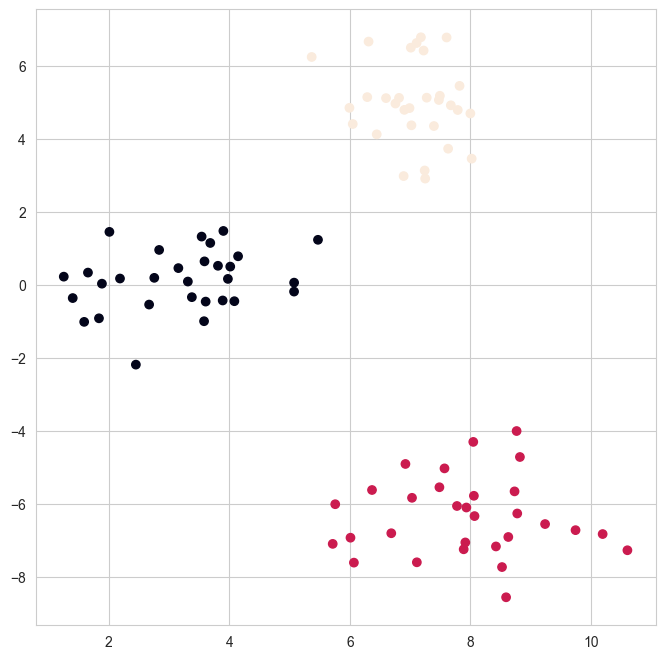

In [23]:
plt.scatter(X[:,0], X[:,1], c=y) #c sevre per identificare i cluster a sconda di y

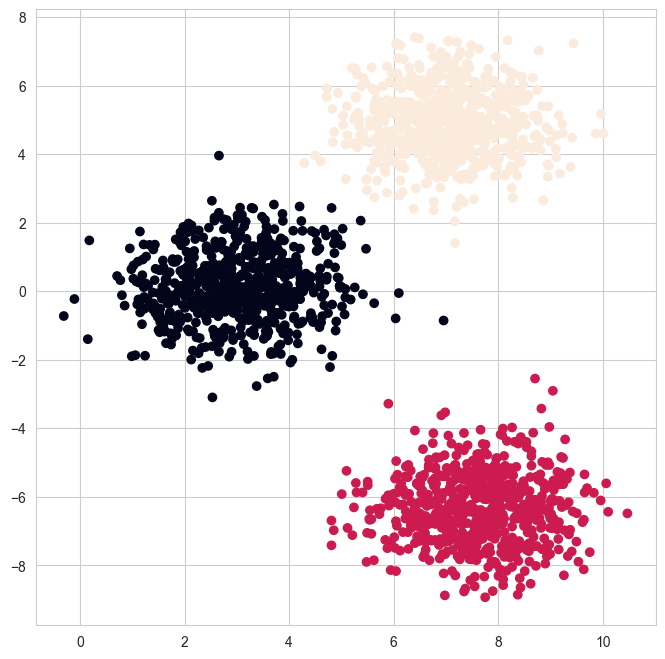

In [24]:
X,y = make_blobs(   #Generate isotropic Gaussian blobs for clustering
    n_samples= 2000,
    n_features=2,
    centers=3,
    cluster_std=1,
    random_state=18
)
plt.scatter(X[:,0], X[:,1], c=y) 

I cluster sono molto più vicini, rischio di overlap

In [26]:
k=KMeans()

est=k.fit(X)
print(est.labels_.shape)

(2000,)


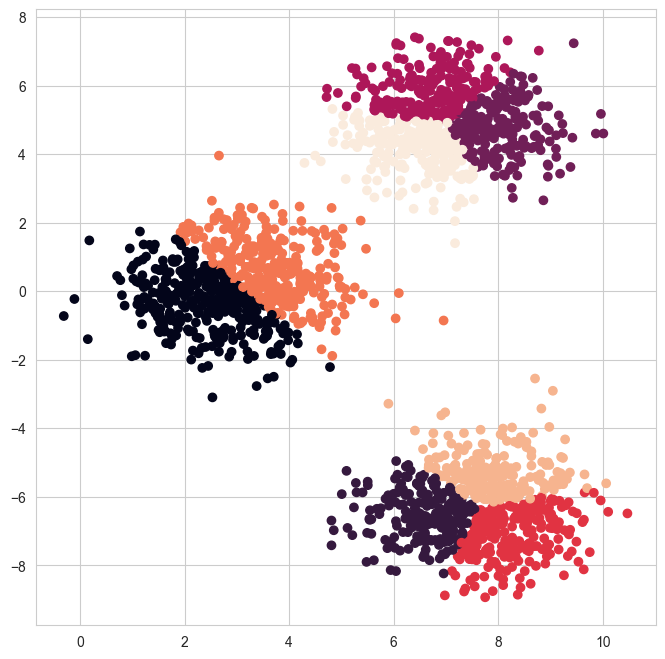

In [27]:
plt.scatter(X[:,0], X[:,1], c=est.labels_)

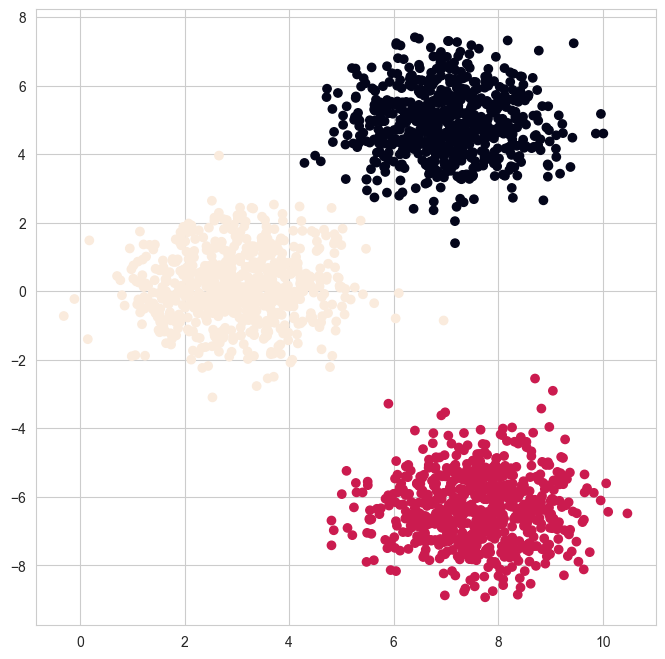

In [28]:
k=KMeans(n_clusters=3) #gia dall'inizio sapevamo che il numero giiusto di cluster è 3 anche se kmeans ne identifica 8
est=k.fit(X)
plt.scatter(X[:,0], X[:,1], c=est.labels_)

In [29]:
#elbow method
inertia_list=[]     #Inertia=WSS
points=[]
#fittiamo dei modelli kmeans
#appendo alla inertia_list tutte le inerzie calcolate per le nostre versioni del kmeans

for num_clusters in range (1,11):
    model = KMeans(n_clusters=num_clusters)
    model.fit(X)
    inertia_list.append(model.inertia_)
    points.append((num_clusters, model.inertia_))

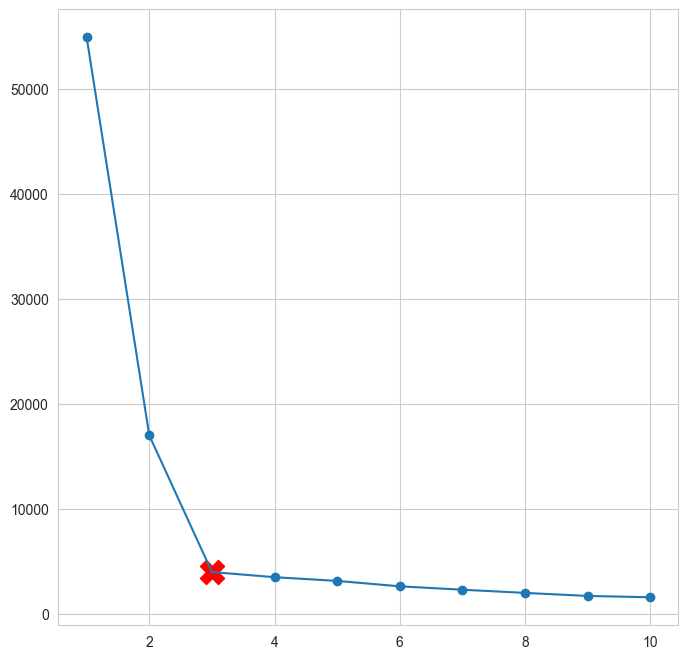

In [30]:
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11), inertia_list) #aggiungo i punti in corrispondenza dei cluster
plt.scatter(3, inertia_list[2], marker="X",s=300, c="r") #vediamo che il punto di gomito è il 3 quindi lo evidenziamo

metodo manuale per implementare l'elbow point
 d= |(y0-m*x0-c/√(1+m^2))| 
 c coefficiente angolare 
 m intercetta


In [ ]:

#cerchiamo l'equazione della retta abline
from numpy import vstack    #per la retta
#se importo gia vstack non devo richiamare np.
from numpy.linalg import lstsq  #esegue una regressione lineare dei minimi quadrati su un sistema di equazioni lineari
points  #dobbiamo trovare l'equazione della retta che passa tra il punto 1 e il punto 10

line_points=[
    points[0],
    points[-1]
]

x_coords,y_coords=zip(*line_points) #zip crea una tupla a partire da una serie di elementi
#l'asterisco serve per fare l'unpack dei valori della tupla (estraiamo i valori di line points)
#dividiamo le due coordinate x e le due coordinate y

print(line_points)
print(x_coords, y_coords)


In [35]:
#tracciamo la linea per la soluzione di ottimizzazione via metodo dei minimi quadrati
# = operazione di fit della linea
A=vstack([x_coords, np.ones(len(x_coords))]).T 
#from numpy import ones
#np.ones(len(x_coords) crea un array np di dimensioni len(x_coords) contenete elementi tutti 1
#con vstack vado a mettee i due arrey uno sopra l'altro
#.T traspone la matrice risultante 
print(A)    #matrice ottenuta dal vertical steack dele coordinate con diag 1

#calcolo i coefficienti della regressione lineare dei minimi quadtari per il sistema di equazioni specificat da A e y_coords e assegna i valori dei coefficienti calcolati a m e c
m,c=np.linalg.lstsq(A, y_coords, rcond=None)[0]
#calcola la soluzione dei minimi quadrati del sistema lineae Ax=b dove A è la matrice dei coefficienti
#rcond è un parametro che specifica la soglia per il rando minimo di A sotto il quale il sistema è considerato malcondizionato
#[0] resittuisce il primo elemnto della tupla, cioè l'array contenete i coefficienti 
#assegnamo i coeff m e c ai valori
print(m,c)
print(f"Equation -> y= {m}x + {c}")

[[ 1.  1.]
 [10.  1.]]
-5923.494139496923 60850.54451990948
Equation -> y= -5923.494139496923x + 60850.54451990948


In [37]:
distances=[]
for i in points:
    xp=i[0]
    yp=i[1]
    d= abs(yp-m*xp-c)/((1+m**2))**1/2
    distances.append(d)

print(distances)

[0.0, 0.00045566254425471564, 0.0005566123514575345, 0.0004792171505921475, 0.0003998301202217147, 0.00032278728496998755, 0.00024296042078034158, 0.00016289671965807488, 8.257708862219115e-05, 2.073644106841664e-19]


I valori di ritorno sono corretti perche la nostra retta deve avere distanza 0 dal punto 1 e dal punto 10

In [42]:
idx=distances.index(max(distances))
print(idx)
#print(distances.index(max(distances)))
print(f"K value -> {points[idx][0]}")

2
K value -> 3


In [45]:
def get_opt_k(points):  #rendiamo tutto una funzione
    from numpy import vstack, ones
    from numpy.linalg import lstsq

    line_points = [
        points[0],
        points[-1]
    ]
    x_coords, y_coords = zip(*line_points)

    print(line_points)
    print(x_coords, y_coords)

    A = vstack([x_coords, ones(len(x_coords))]).T
    print(A)
    m, q = np.linalg.lstsq(A, y_coords, rcond=None)[0]

    print(f"Equation -> y = {m}x + {q}")

    distances = []

    for i in points:
        xp = i[0]
        yp = i[1]
        d = abs(yp - m * xp - q) / ((1 + m**2))**1/2
        distances.append(d)

    print(distances)
    idx = distances.index(max(distances))
    print(idx)
    print(f"K value -> {points[idx][0]}")
    return idx
    

[(1, 54927.05038041256), (10, 1615.6031249402715)]
(1, 10) (54927.05038041256, 1615.6031249402715)
[[ 1.  1.]
 [10.  1.]]
Equation -> y = -5923.494139496923x + 60850.54451990948
[0.0, 0.00045566254425471564, 0.0005566123514575345, 0.0004792171505921475, 0.0003998301202217147, 0.00032278728496998755, 0.00024296042078034158, 0.00016289671965807488, 8.257708862219115e-05, 2.073644106841664e-19]
2
K value -> 3
3


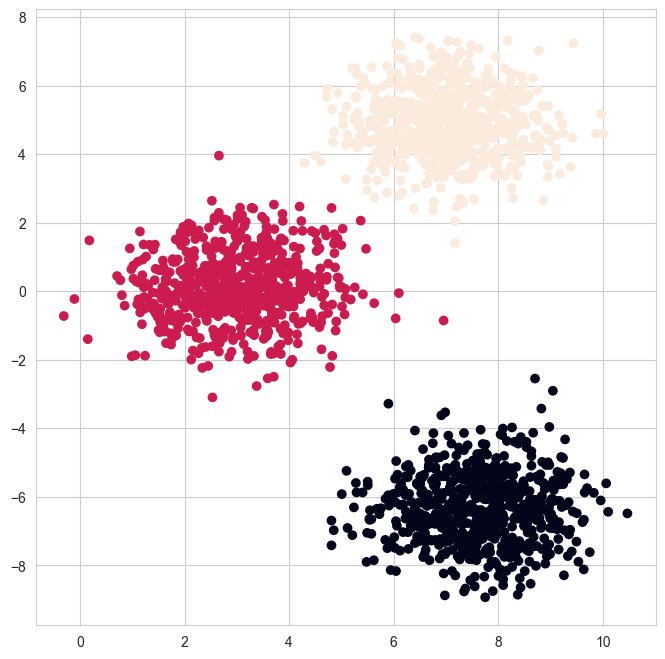

In [47]:
opt_k=get_opt_k(points) 
print(points[opt_k][0])

model=KMeans(n_clusters=points[opt_k][0])
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_)


Otteniamo lo stesso grafico con il numero di cluster deciso tramite elbow point

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [54927.05038041256, 17027.178544957984, 4019.4743817225662, 3527.2323956672835, 3174.768175773308, 2657.7987327621686, 2336.2001007993167, 2031.2216350215563, 1744.2031962082563, 1615.6031249402715]


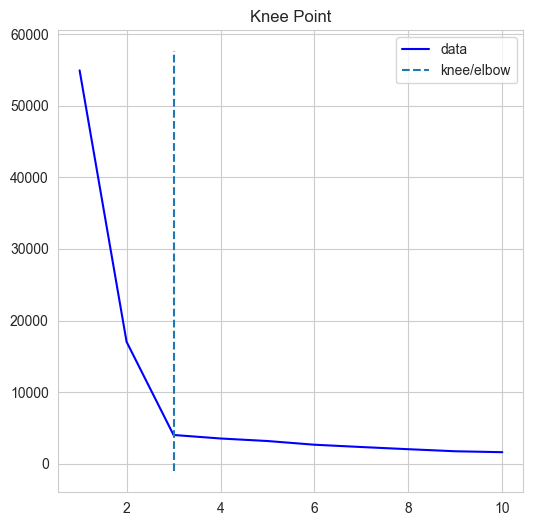

In [52]:
#!pip3 install kneed
from kneed import KneeLocator
x=[p[0] for p in points]
y=[p[1] for p in points]

print (x,y)

knee= KneeLocator(x,y, curve="convex", direction="decreasing")
#gli ultimi due parametri li impostiamo per creare la linea e sappiamo già che caratteristiche hanno

knee.plot_knee()

3


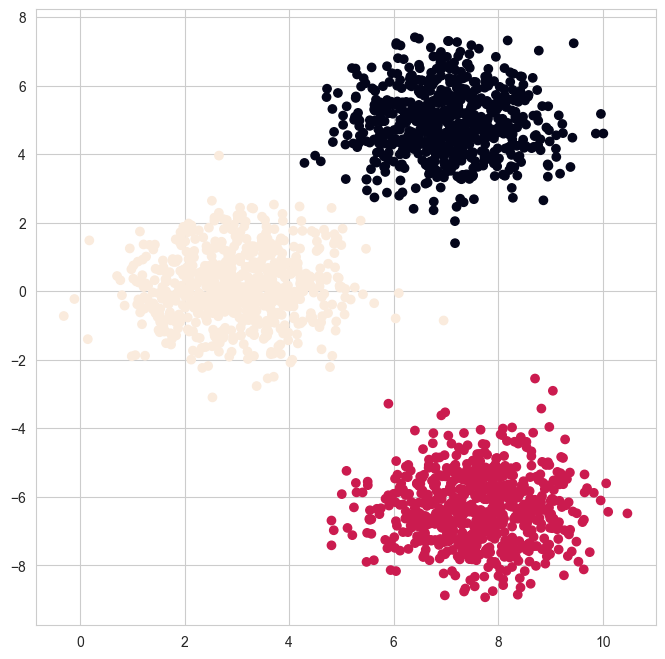

In [54]:
print(knee.knee)
model=KMeans(n_clusters=knee.knee)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_)

Otteniamo nuovamente lo stesso risultato non sono perfettamente identici peche il kmeans non è bene in grado di riprodurre le sovrapposizioni dei punti  ma è una buona approssimazione.